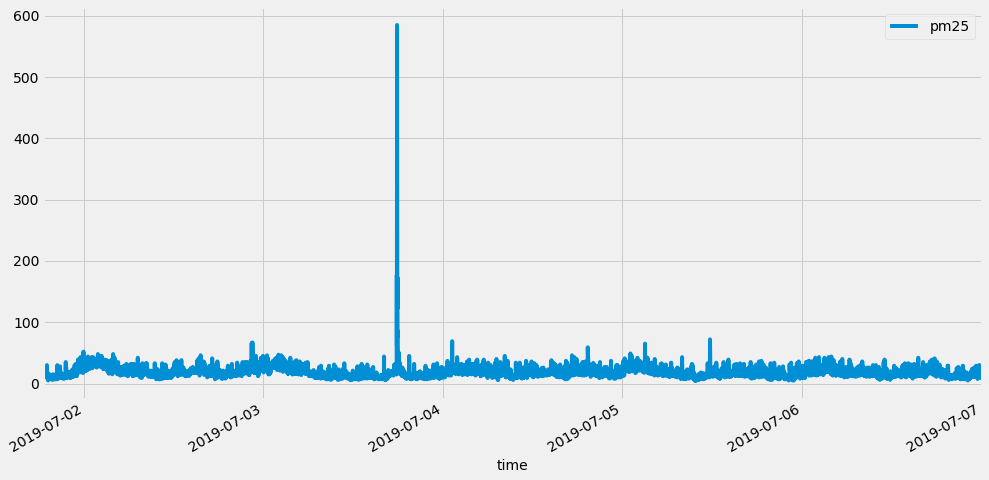

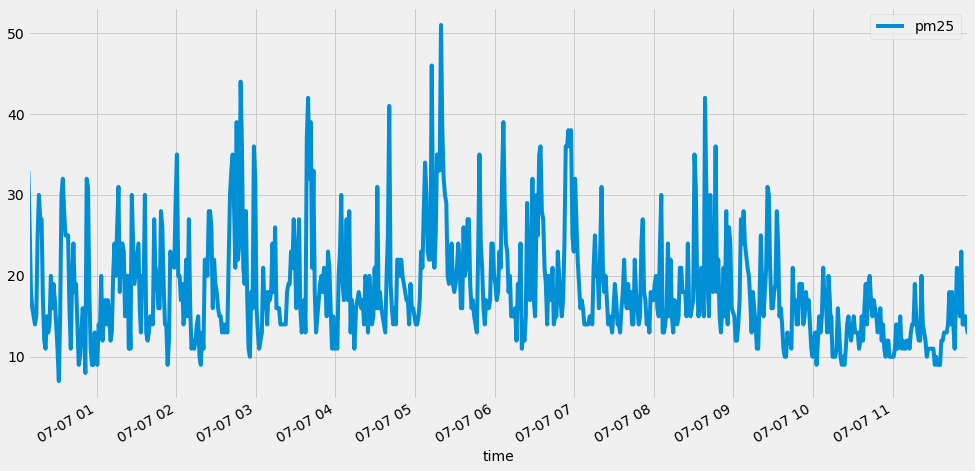

In [27]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

df = pd.read_excel("data.xls")



# Data Preprocessing

cols = ['_id', 'battery', 'distance', 'location', 'name', 'source', 'ward_id']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('time')

   
df['time'] = pd.to_datetime(df['time'], unit='ms')


df = df[['time','pm25']]
df.isnull().sum()


#df = df.groupby('time')['pm25'].mean().reset_index()
df = df.set_index('time')
df.index



train=df[0:7500] 
test=df[7500:]




train.plot(figsize=(15,8), fontsize=14)
test.plot(figsize=(15,8), fontsize=14)
plt.show()


In [28]:

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [29]:
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:

look_back = 3
training_set = train.iloc[:].values
testing_set = test.iloc[:].values
training_set
testing_set
trainX, trainY = create_dataset(training_set, look_back)
testX, testY = create_dataset(testing_set, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 12s - loss: 232.0190
Epoch 2/100
 - 11s - loss: 112.5319
Epoch 3/100
 - 11s - loss: 94.9479
Epoch 4/100
 - 11s - loss: 89.3805
Epoch 5/100
 - 11s - loss: 87.6170
Epoch 6/100
 - 11s - loss: 86.3450
Epoch 7/100
 - 11s - loss: 84.4207
Epoch 8/100
 - 11s - loss: 85.3351
Epoch 9/100
 - 11s - loss: 84.0432
Epoch 10/100
 - 11s - loss: 84.5958
Epoch 11/100
 - 10s - loss: 83.9387
Epoch 12/100
 - 11s - loss: 86.5194
Epoch 13/100
 - 11s - loss: 84.4458
Epoch 14/100
 - 10s - loss: 83.4761
Epoch 15/100
 - 11s - loss: 84.5421
Epoch 16/100
 - 11s - loss: 85.5999
Epoch 17/100
 - 11s - loss: 83.3728
Epoch 18/100
 - 10s - loss: 84.1318
Epoch 19/100
 - 10s - loss: 82.8601
Epoch 20/100
 - 10s - loss: 82.9704
Epoch 21/100
 - 11s - loss: 85.3763
Epoch 22/100
 - 10s - loss: 84.8768
Epoch 23/100
 - 10s - loss: 83.7635
Epoch 24/100
 - 10s - loss: 83.6738
Epoch 25/100
 - 10s - loss: 81.5450
Epoch 26/100
 - 10s - loss: 82.4567
Epoch 27/100
 - 10s - loss: 83.2223
Epoch 28/100
 - 10s - loss: 85.6420

Train Score: 5192.73 RMSE
Test Score: 3140.53 RMSE


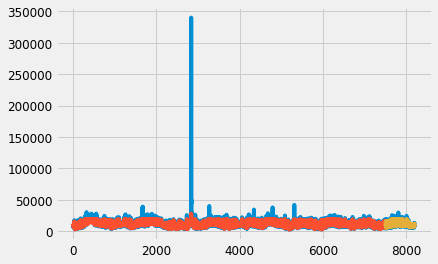

In [31]:

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()